In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/Club gamma/Air-quality-index/Shreya/Air-Quality-Index-Analysis/data/aqi_scaled.csv')  # Update the path to your CSV file if necessary

# Preview the dataset
print(df.head())


         co        no       no2        o3       so2     pm2_5      pm10  \
0  0.321787  0.010030  0.289898  0.023973  0.260175  0.668815  0.659978   
1  0.460346  0.107414  0.370809  0.000565  0.382894  0.775646  0.783901   
2  0.584321  0.243760  0.418761  0.001942  0.494464  0.856636  0.876643   
3  0.584321  0.235487  0.466670  0.011351  0.568767  0.839820  0.863416   
4  0.562443  0.198327  0.496656  0.030293  0.643147  0.827175  0.855412   

        nh3  
0  0.551818  
1  0.793117  
2  0.950612  
3  0.930974  
4  0.901419  


         co        no       no2        o3       so2     pm2_5      pm10  \
0  0.321787  0.010030  0.289898  0.023973  0.260175  0.668815  0.659978   
1  0.460346  0.107414  0.370809  0.000565  0.382894  0.775646  0.783901   
2  0.584321  0.243760  0.418761  0.001942  0.494464  0.856636  0.876643   
3  0.584321  0.235487  0.466670  0.011351  0.568767  0.839820  0.863416   
4  0.562443  0.198327  0.496656  0.030293  0.643147  0.827175  0.855412   

        nh3  
0  0.551818  
1  0.793117  
2  0.950612  
3  0.930974  
4  0.901419  


C:\Users\HP\AppData\Local\Temp\ipykernel_17244\1538823756.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Average AQI', data=avg_aqi, palette='viridis')


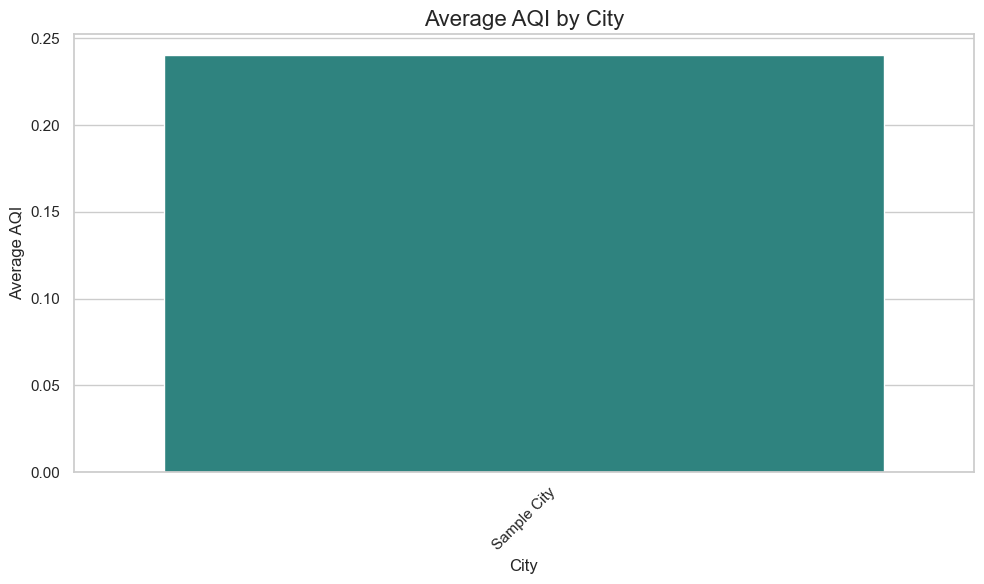

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Update the path to your CSV file if necessary
df = pd.read_csv('D:/Club gamma/Air-quality-index/Shreya/Air-Quality-Index-Analysis/data/aqi_scaled.csv')

# Preview the dataset
print(df.head())

# Step 2: Calculate the synthetic AQI
# Here we can take the average of the pollutants as a simple AQI representation
# You can modify the calculation based on your own criteria for AQI.
df['AQI'] = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean(axis=1)

# Step 3: For demonstration, let's assume all data points belong to the same city for simplicity
df['City'] = 'Sample City'  # Replace with your city names if available

# Step 4: Calculate average AQI
avg_aqi = df.groupby('City')['AQI'].mean().reset_index()

# Rename the columns for clarity
avg_aqi.columns = ['City', 'Average AQI']

# Step 5: Visualize Average AQI
# Set the aesthetics for seaborn
sns.set(style='whitegrid')

# Create a bar plot for average AQI by city
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Average AQI', data=avg_aqi, palette='viridis')
plt.title('Average AQI by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


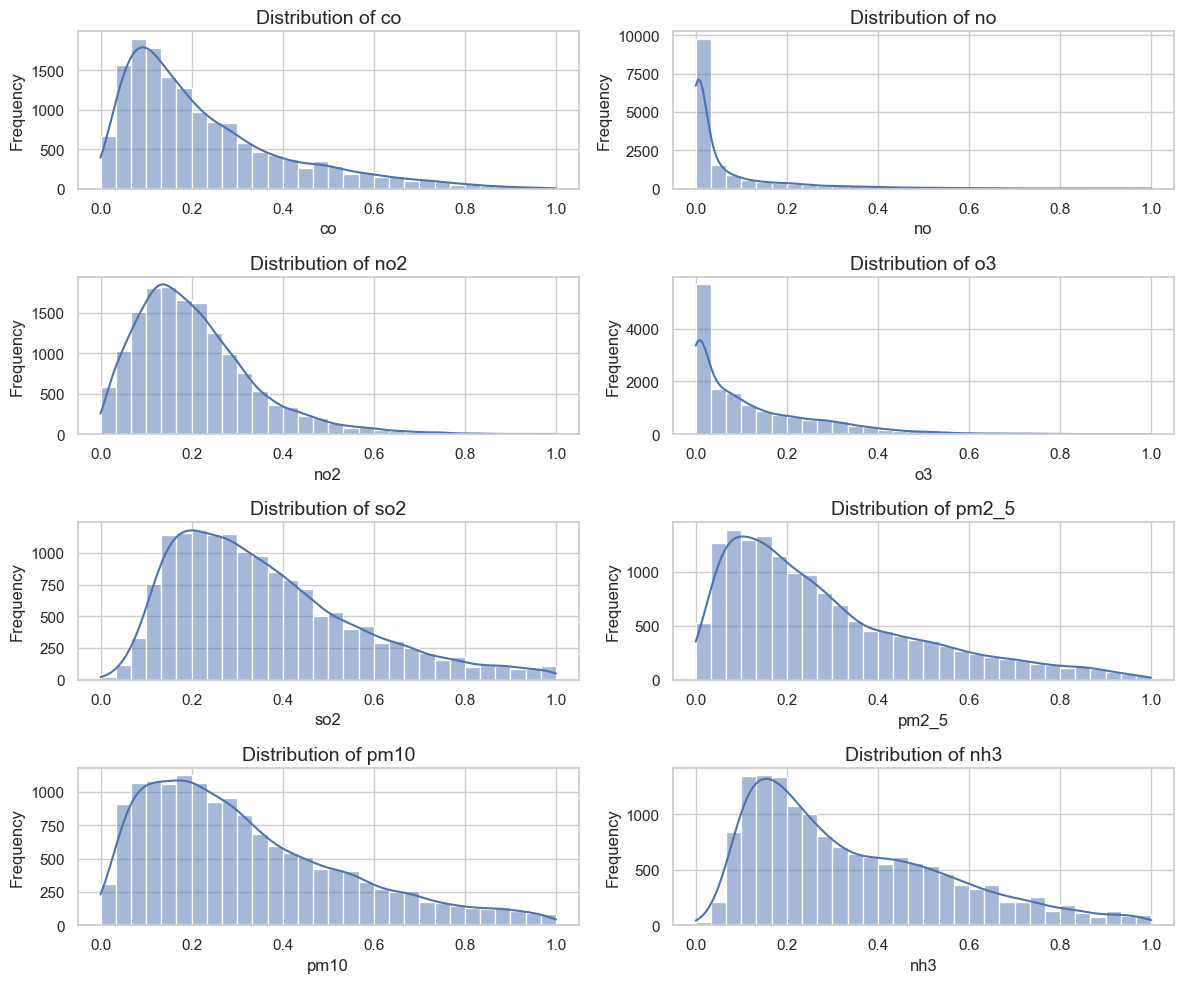

In [5]:
# Step 1: Plot Histograms for Each Pollutant
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(12, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}', fontsize=14)
    plt.xlabel(pollutant, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


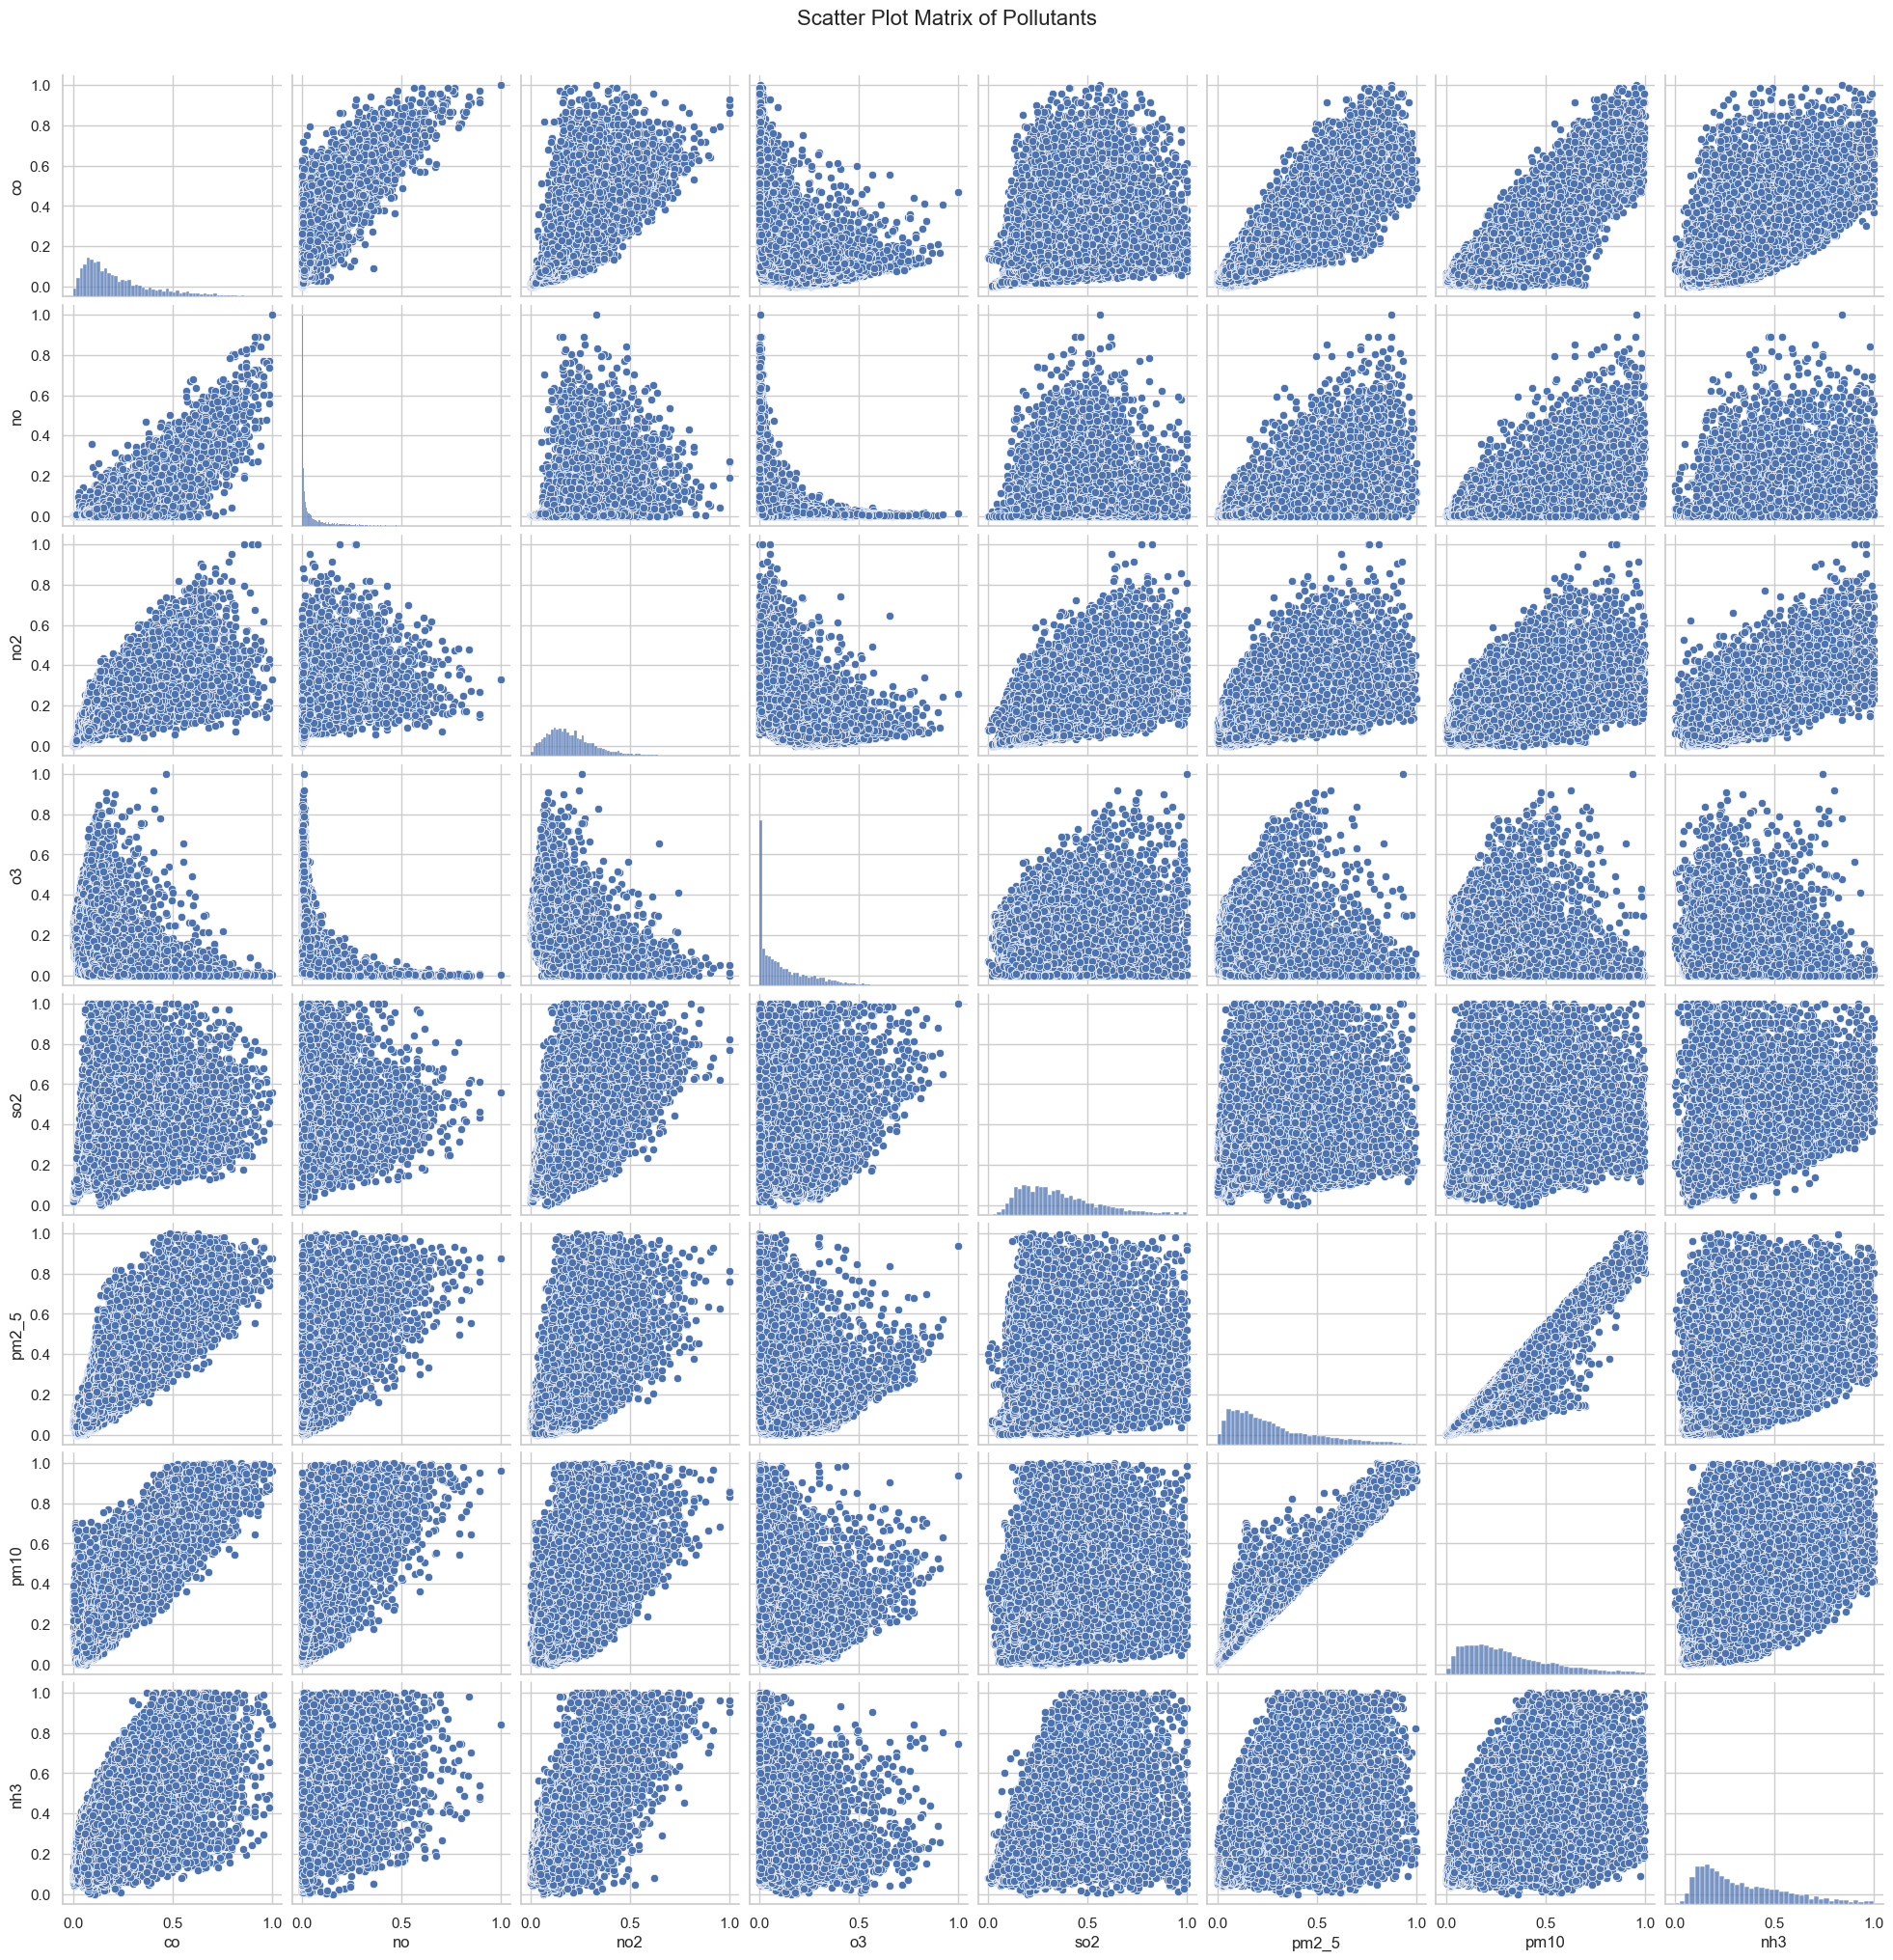

In [6]:
# Step 2: Scatter Plot Matrix
sns.pairplot(df[pollutants])
plt.suptitle('Scatter Plot Matrix of Pollutants', y=1.02, fontsize=16)
plt.show()


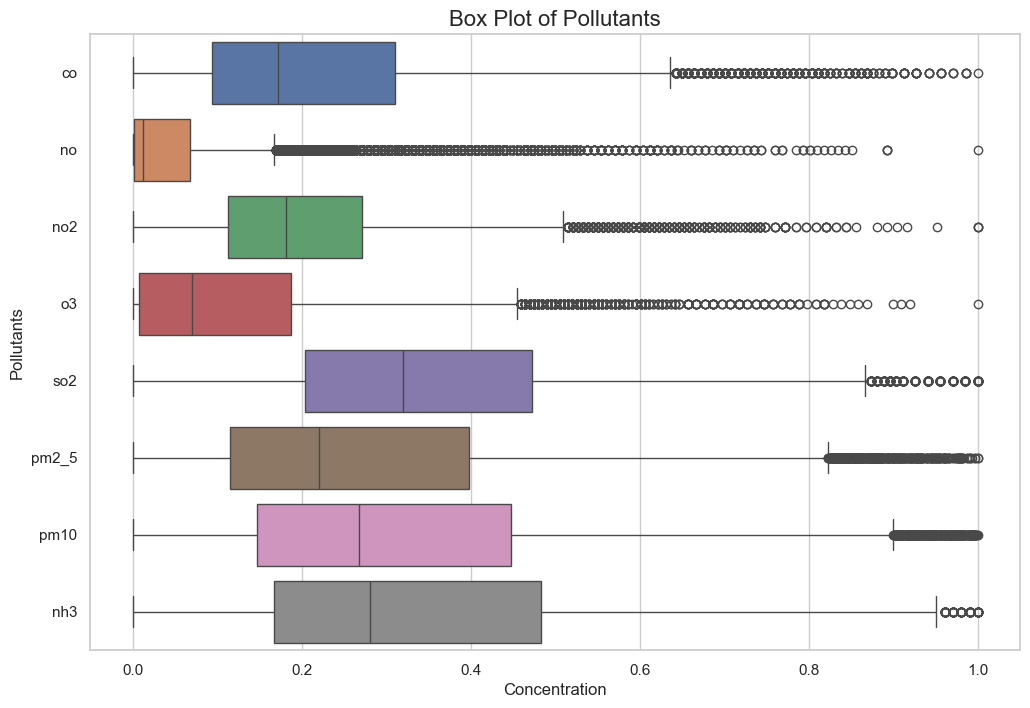

In [7]:
# Step 3: Box Plot for Each Pollutant
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[pollutants], orient='h')
plt.title('Box Plot of Pollutants', fontsize=16)
plt.xlabel('Concentration', fontsize=12)
plt.ylabel('Pollutants', fontsize=12)
plt.show()


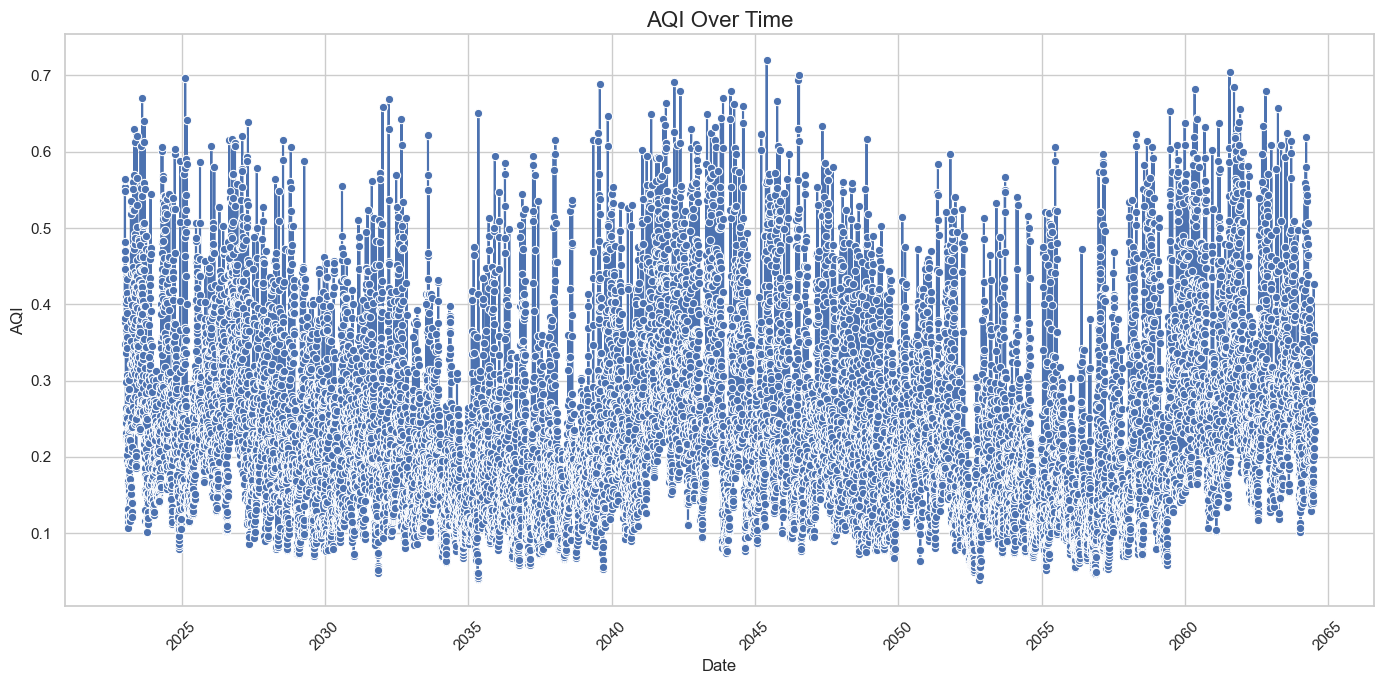

In [8]:
# Step 4: Generate some example date range if not available
# Assuming you have a 'Date' column in the original dataset
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Line Plot of AQI Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='AQI', data=df, marker='o')
plt.title('AQI Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


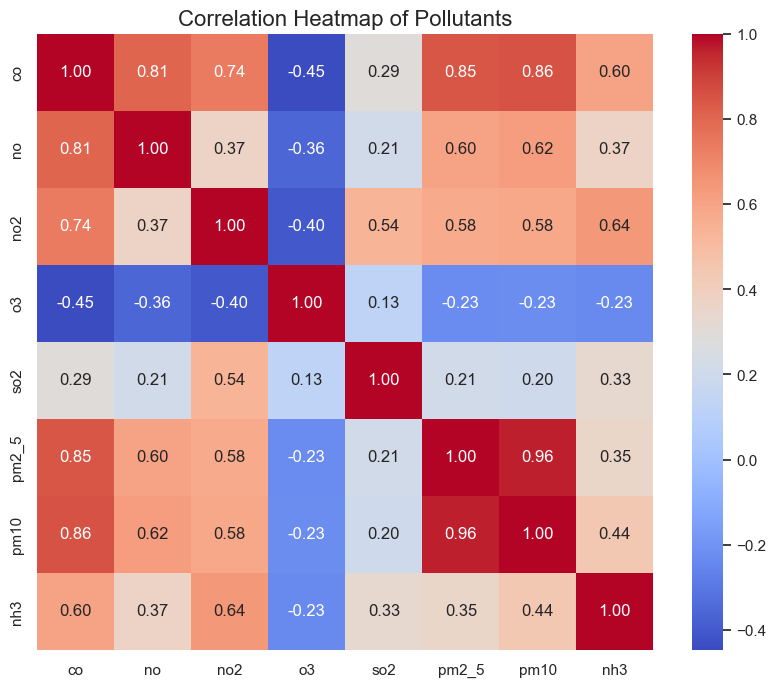

In [9]:
# Step 5: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[pollutants].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Pollutants', fontsize=16)
plt.show()
